# Trabalho Final - Computação Científica e Análise de Dados

## Implementando manualmente rede neural com gradiente descendente e backpropagation

### Sobre este projeto:

Neste projeto, iremos abordar dois algoritmos, um visto na disciplina e outro não, fazendo uma análise de seus funcionamentos e apresentando o processo de pensamento utilizado no desenvolvimento desses algoritmos. O intuito do projeto é implementar por minha própria conta os algoritmos, sem utilizá-los já prontos de bibliotecas, visando maximizar o meu entendimento sobre eles.

Os algoritmos em questão são o Gradiente Descendente e Backpropagation, que, no contexto de treinamentos de modelos para reconhecimento de padrões (Redes Neurais), são utilizados em conjunto. A rede neural terá uma hidden layer (Camada escondida) e para testar sua eficiência usaremos a base de dados MNIST, já que o foco é o algoritmo e não os dados e a MNIST é uma base de dados sólida, bem estruturada e fácil de trabalhar.

Vale destacar que a implementação realizada será específica para este exemplo, portanto, o algoritmo não será exatamente igual foi visto em sala.


### Funcionamento da rede neural:

Em uma rede neural, temos 2 principais conceitos: Os pesos e as funções de ativação. Para os pesos, iremos inicializá-los de forma aleatória e ao longo do treinamento do modelo eles se ajustarão da melhor maneira possível, visando minimizar o erro ao final. Cada peso está ligado a uma aresta, ou seja, ele representa o quanto cada nó de um nível deve impactar outro nó do próximo nível. Além dos pesos, temos os viéses, que são constantes somadas a cada output do novo nível, visando influenciar de forma direta aquele valor, independente dos resultados do nível anterior. Ambos serão treinados pelo modelo.

Já as funções de ativação serão responsáveis por "deslinearizar" os resultados obtidos, já que se só utilizarmos multiplicação e soma nosso resultado não será melhor do que um palpite linear e com redes neurais buscamos desempenhos melhores. A escolha das funções de ativação impacta diretamente no resultado do modelo. Para esse exemplo, como temos uma camada escondida e a camada final, precisamos de duas funções de ativação. A primeira, escolhida para a camada escondida, será a reLU, função bastante utilizada no treinamento de modelos, que tem a seguinte forma:

$ f(x) = max(0,x) $

Ou seja, retorna x se x é maior que 0 e 0 caso contrário, o que faz dela uma função bem simples.

E tem gráfico:

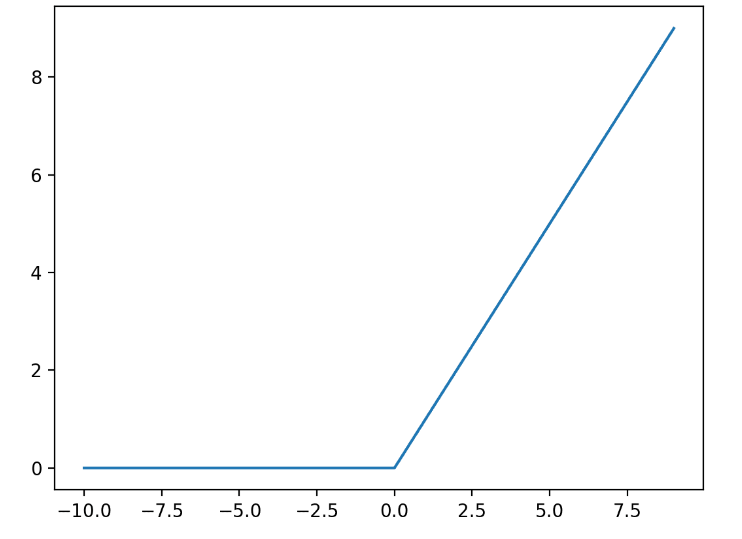

Já para a camada final, queremos que nosso resultado represente a probabilidade da imagem ser determinado dígito, portanto, utilizaremos a função softmax, que normaliza x em uma distribuição probabilística.

$ f(Z)_i = \frac{e^{zi}}{\sum{}e^{zj}} $

Ou seja, pega a porcentagem daquele valor no todo.

E tem gráfico:

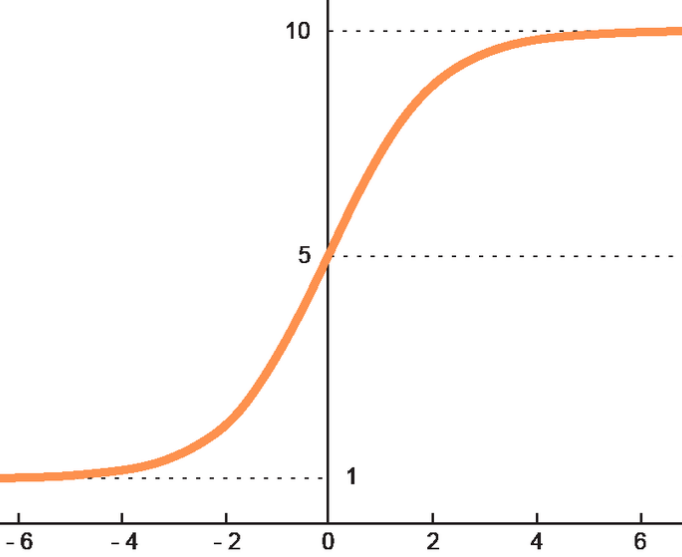

### Implementação:

Sobre a implementação, como temos 3 camadas, temos 2 conjuntos de arestas ligando essas camadas e 2 conjuntos de resultados, assim, precisamos de 2 matrizes de pesos e 2 vetores de vieses.

Os dados do MNIST são imagens 28x28, logo, possuem 784 píxels, assim, a matriz de pesos 1 precisa ter 784 colunas. Para a camada intermediária, teremos 10 nós, portanto, a matriz deve ter 10 linhas. Como o viés soma por nó de destino, o viés 1 será um vetor 10x1.

Já para o segundo conjunto de arestas, teremos 10 na camada intermediária e 10 na de saída (10 dígitos), portanto, uma matriz 10x10. O víes será novamente um vetor 10x1.

Realizando a inicialização aleatória:

In [ ]:
import numpy as np
import math as m
from matplotlib import pyplot as plt

In [ ]:
# Função que inicializa os parâmtros para a rede neural de forma aleatória, utilizando numpy arrays para irá facilitar o desenvolvimento
def inicializaParametros():
  Pesos1 = np.random.rand(10, 784) - 0.5
  Vies1 = np.random.rand(10, 1) - 0.5

  Pesos2 = np.random.rand(10, 10) - 0.5
  Vies2 = np.random.rand(10, 1) - 0.5

  return Pesos1, Vies1, Pesos2, Vies2

Agora, vamos à primeira etapa do treinamento do modelo, que é o forwardpropagation. Nessa etapa, calculamos o resultado a partir de uma (ou mais) entrada utilizando os pesos e viéses que temos atualmente. Primeiro, multiplicamos a entrada pelos pesos relacionados às primeiras arestas e somamos o primeiro vetor de viéses. Então, aplicamos a função de ativação para obter o resultado final para este nível. Depois, pegamos este resultado e fazemos o mesmo processo para a próxima camada.

Aqui, a entrada será um grande conjunto de imagens, ou seja, uma matriz $E_{784\space x \space m}$, com m sendo a quantidade de imagens.

Temos:

$ Z^1_{10\space x \space m} = P^1_{10\space x \space 784} * E_{784\space x \space m} + V^{1}_{10\space x \space 1}\\
A^1_{10\space x \space m} = reLU(Z^1_{10\space x \space m})$

Para o segundo passo, temos:

$ Z^2_{10\space x \space m} = P^2_{10\space x \space 10} * A^1_{10\space x \space m} + V^{2}_{10\space x \space 1} \\
A^2_{10\space x \space m} = softmax(Z^2_{10\space x \space m})$

Assim, essa última matriz é o nosso resultado, onde cada coluna representa um caso de treino (Com o palpite do modelo).

Temos:

In [ ]:
# Função de ativação 1: Retorna x se x > 0 e 0 caso contrário
def reLU(X):
    return np.maximum(X, 0)

# Função de ativação 2: Transforma a saída em algo que pode ser utilizado como probabilidade.
def softmax(X):
  A = np.exp(X) / sum(np.exp(X))
  return A

# Aplica os pesos, viéses e funções de ativação à entrada para obter o resultado
def forwardPropagation(Entrada, Pesos1, Vies1, Pesos2, Vies2):
  Z1 = Pesos1.dot(Entrada) + Vies1
  Ativacao1 = reLU(Z1)

  Z2 = Pesos2.dot(Ativacao1) + Vies2
  Ativacao2 = softmax(Z2)

  return Z1, Ativacao1, Z2, Ativacao2

Agora, vamos à seguda etapa do processo, que é o backpropagation. Nesta etapa, utilizamos o backpropagation para calcular as derivadas de maneira rápida e, assim, descobrir o gradiente para que possamos melhorar nossos palpites.

Começamos no final, calculando o erro do resultado em relação aos pesos e, para isso, utilizamos a regra da cadeia, multiplicando as derivadas. O objetivo é identificar o quanto cada peso influenciou no resultado final e o quanto cada um deve ser modificado para obter o melhor resultado possível naquele cenário.

Começando pelo final (Nível de saída), podemos escolher como iremos medir o erro gerado ao final do fowardpropagation, para esse caso, vamos escolher a entropia cruzada.

Esse é um truque matemático muito utilizado na construção de redes neurais pela forma como a função softmax e a entropia cruzada interagem. Vamos analisar essa interação. Utilizando a regra da cadeia, podemos escrever a derivada do erro em relação a entrada como:

$\frac{\partial Erro}{\partial Pesos} = \frac{\partial Erro}{\partial Ativacao} * \frac{\partial Ativacao}{\partial Resultado} * \frac{\partial Resultado}{\partial Pesos} $

Com entrada sendo a ativação da camada anterior e resultado sendo pesos * entrada + viés. A derivada do erro pela ativação será a derivada do erro que escolhermos (Entropia cruzada) e a derivada da ativação pelo resultado será simplesmente a derivada da função de ativação (Softmax). Sendo assim, ambas são multiplicadas, porém, quando elas são multiplicadas o resultado gerado é (Resultado obtido (Ativacao) - Resultado esperado (Y)), o que simplifica muito o cálculo. Por essa razão que, em redes neurais, muitas vezes essas duas funções são utilizadas em conjunto.

$ \frac{\partial Erro}{\partial Ativacao} * \frac{\partial Ativacao}{\partial Resultado} = (Ativacao - Y) \\ $

Agora, vamos analisar a derivada parcial do resultado pelos pesos:

$ Resultado = Entrada * Pesos + Viés \\
\frac{\partial Resultado}{\partial Pesos} = \frac{\partial (Entrada * Pesos + Viés)}{\partial Pesos} \\
\frac{\partial Resultado}{\partial Pesos} = Entrada$

Portanto, concuímos que a derivada do erro em relação à entrada para a camada de saída é:

$ \frac{\partial Erro}{\partial Pesos} = Erro \space * \space Entrada$

Para o viés, basta fazermos a média dos erros.

Para a camada oculta, temos:

Para continuar propagando o erro para trás, começamos com o erro sendo a entrada da próxima camada e vamos até os pesos desta camada.

$\frac{\partial Erro}{\partial Pesos} = \frac{\partial Erro}{\partial Ativacao} * \frac{\partial Ativacao}{\partial Resultado} * \frac{\partial Resultado}{\partial Pesos} $

Para a derivada do erro pela saída desta camada, temos:

$ Erro = Pesos2 * Ativacao1 + Viés2 \\
\frac{\partial Erro}{\partial Ativacao} = \frac{\partial (Pesos2 * Ativacao1 + Viés2)}{\partial Ativacao1} \\
\frac{\partial Erro}{\partial Ativacao} = Pesos2$

Para a derivada da ativação em reação ao resultado, temos simplesmente a derivada da função reLU (Que é a função aplicada nesta etapa). A derivada da função reLU é 1, caso a entrada seja positiva, e 0 caso contrário.

$\frac{\partial Ativacao}{\partial Resultado} = reLU'$

Para a derivada do resultado pelos pesos, temos simplemente a entrada X (Já vimos o mesmo cálculo).

Por fim, multiplicamos o erro para "propagar" e descobrir como essa camada influenciou o resultado final lá na frente. Temos o resultado para a camada intermediária:

$\frac{\partial Erro}{\partial Entrada} = reLU'(x) * Pesos2 * Erros * Entrada $

Lembrando que, por termos utilizado diversas entradas simultaneamente, precisamos calcuar a média. Temos:

In [ ]:
# Função que pega os labels de cada imagem (Valor numérico, exemplo: 5) e transforma em um vetor de tamanho 10 com 1 na posição que corresponde ao dígito e zero nas restantes.
# Necessário para calcular o erro através da entropia cruzada
def parseEntrada(Y):
  novoY = np.zeros((Y.size, Y.max() + 1))
  novoY[np.arange(Y.size), Y] = 1
  novoY = novoY.T
  return novoY

# Derivada da função reLU: 1 caso x > 0 e 0 caso contrário, podemos usar a abstração do python para representar isso apenas com uma linha de código
def reLUDerivada(X):
  return X > 0

# Função que realiza o backpropagation e recupera as derivadas para os pesos e viéses
def backPropagation(Entrada, Z1, Ativacao1, Z2, Ativacao2, Pesos1, Pesos2, Y):
  resultadoEsperado = parseEntrada(Y)
  Erros = Ativacao2 - resultadoEsperado

  _, m = Entrada.shape

  dP2 = (1/m) * Erros.dot(Ativacao1.T)
  dV2 = (1/m) * np.sum(Erros)

  dE1 = Pesos2.T.dot(Erros) * reLUDerivada(Z1)
  dP1 = (1/m) * dE1.dot(Entrada.T)
  dV1 = (1/m) * np.sum(dE1)

  return dP1, dV1, dP2, dV2

Agora que calculamos as derivadas, podemos aplicar o gradiente utilizando alpha para gerar os pesos e viéses melhorados, e assim seguir para mais uma execução do gradiente descendente.

In [ ]:
# Função que atualiza os parâmetros para o gradiente descendente
def atualizaParametros(Pesos1, Vies1, Pesos2, Vies2, dP1, dV1, dP2, dV2, alpha):
  Pesos1 = Pesos1 - alpha * dP1
  Vies1 = Vies1 - alpha * dV1

  Pesos2 = Pesos2 - alpha * dP2
  Vies2 = Vies2 - alpha * dV2

  return Pesos1, Vies1, Pesos2, Vies2

Agora que temos todos os passos do algoritmo construídos, podemos juntar tudo para fazer o gradiente descendente:

Primeiro, geramos paramêtros aleatórios.

Fazemos o forwardpropagation para calcular as previsões da rede neural para esses valores.

Calculamos as derivadas para descobrir o quanto mexer em cada peso/viés

Por fim, utilizamos esses valores para melhorar nosso modelo, completando, assim, um ciclo de treinamento com o gradiente descendente.

In [ ]:
# Função que recupera qual o dígito mais provável
def recuperaPrevisoes(Saida):
  return np.argmax(Saida, 0)

# Função para calcular a quantidade de acertos
def calculaAcuracia(previsoes, Y):
  return np.sum(previsoes == Y) / Y.size

# Gradiente descendente, juntando tudo
def gradienteDescendente(X, Y, qntIteracoes, alpha):
  Pesos1, Vies1, Pesos2, Vies2 = inicializaParametros()
  acertoAoLongoDoTempo = []

  for i in range(qntIteracoes):
    Z1, Ativacao1, Z2, Ativacao2 = forwardPropagation(X, Pesos1, Vies1, Pesos2, Vies2)
    dP1, dV1, dP2, dV2 = backPropagation(X, Z1, Ativacao1, Z2, Ativacao2, Pesos1, Pesos2, Y)
    Pesos1, Vies1, Pesos2, Vies2 = atualizaParametros(Pesos1, Vies1, Pesos2, Vies2, dP1, dV1, dP2, dV2, alpha)

    previsoes = recuperaPrevisoes(Ativacao2)
    acuracia = calculaAcuracia(previsoes, Y)
    acertoAoLongoDoTempo.append(acuracia)
    if i % 50 == 0:
      print(f'Acurácia na iteração {i}: {acuracia}\n')

  return Pesos1, Vies1, Pesos2, Vies2, acertoAoLongoDoTempo

Esse algoritmo não é exatamente o que vimos em sala, como foi dito anteriormente, ele foi adaptado para utilizar diversas entradas simultaneamente e para este exemplo em específico.

Agora, estamos prontos para testar e ver como o modelo irá se sair na prática.

### Resultados

Agora, precisamos importar a base de dados MNIST para testar o funcionamento da nossa implementação.
Para isso, segui o passo a passo disponível no colab oficial do MNIST (link nas referências) para importar os dados e separar os píxeis dos labels.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml('mnist_784', as_frame=False, cache=False)

X = mnist.data.astype('float32')
Y = mnist.target.astype('int64')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


O próximo passo é dividir os conjuntos de treino e de teste, para que possamos treinar o modelo e conferir seu percentual de acerto depois. Para isso, foi utilizada a função train_test_split da biblioteca sklearn. Nela, dizemos como deve ser feita a divisão (Nesse exemplo, 20% para testes e 80% para treino) e setamos a propriedade shuffle como True, para que os dados sejam randomizados

Depois disso, transformamos os conjuntos em arrays do numpy (por razões de implementação) e fazemos a transposta, por que queremos que cada coluna seja um exemplo, para que a implementação funcione.

Por fim, normalizamos os conjuntos X para evitar problemas de overflow, dividindo por 255 (Valor máximo de um píxel) para que tenhamos apenas valores entre 0 e 1.

Temos:

In [ ]:
X_treino, X_dev, Y_treino, Y_dev = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

X_treino = np.array(X_treino).T
X_dev = np.array(X_dev).T
Y_treino = np.array(Y_treino).T
Y_dev = np.array(Y_dev).T
X_treino /= 255.
X_dev /= 255.

Vamos ao que interessa, utilizar o gradiente descendente para o treinamento do modelo. Passamos X_treino e Y_treino, a quantidade de iterações e o alpha (Learning rate) e recebemos em retorno os pesos e viéses de cada um dos níveis.

Para esse exemplo utilizei 500 passos e um alpha = 0.5, se quiser testar valores diferentes basta mudar no código abaixo. Como o MNIST é um Dataset bem grande, o gradiente descendente demora um tempo considerável para treinar o modelo.

In [ ]:
P1, v1, P2, v2, acertos = gradienteDescendente(X_treino, Y_treino, 501, 0.5)

Acurácia na iteração 0: 0.068375

Acurácia na iteração 50: 0.6571428571428571

Acurácia na iteração 100: 0.8070357142857143

Acurácia na iteração 150: 0.8442857142857143

Acurácia na iteração 200: 0.86375

Acurácia na iteração 250: 0.8772142857142857

Acurácia na iteração 300: 0.8865714285714286

Acurácia na iteração 350: 0.8921785714285714

Acurácia na iteração 400: 0.8966428571428572

Acurácia na iteração 450: 0.9004821428571429

Acurácia na iteração 500: 0.9087142857142857



Como podemos analisar do percentual de acerto ao longo do treinamento, percebemos que inicialmente o modelo tem um acerto próximo a 10%, que seria o mesmo que chutar algum valor fixo. Rapidamente o acerto aumenta e, quanto mais se aproxima do melhor valor, mais lento se torna o progresso. Isso ocorre por que o algoritmo já está bem próximo do mínimo local que está tentando alcançar.

Gráfico acurácia x iteração:

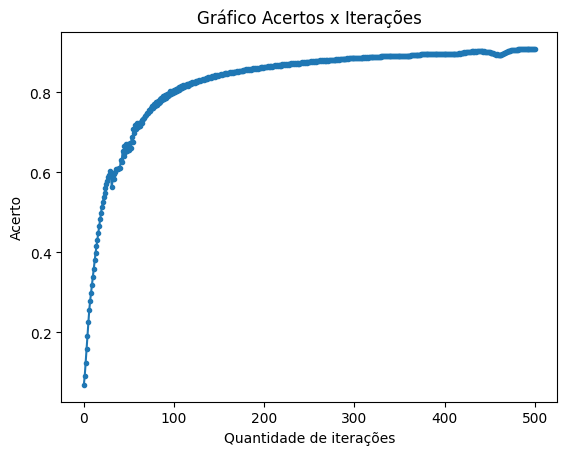

In [ ]:
iteracoes = np.arange(len(acertos))

plt.plot(iteracoes, acertos, marker='.')  # Pode personalizar o marcador conforme desejado

plt.xlabel('Quantidade de iterações')
plt.ylabel('Acerto')

plt.title('Gráfico Acertos x Iterações')

plt.show()

No gráfico podemos ver com mais detalhes o que já havia sido percebido, inicialmente o crescimento é bem rápido, depois, quando o algoritmo já está se aproximando do mínimo local, o crescimento cai gradualmente.

Vamos ver como o modelo se sai nos casos de teste:

In [ ]:
# Função para testar o modelo no conjunto de testes (Ainda não foi visto)
def testaModelo(P1, v1, P2, v2, X_dev, Y_dev):
  _, _, _, Resultado = forwardPropagation(X_dev, P1, v1, P2, v2)
  previsoes = recuperaPrevisoes(Resultado)
  acerto = calculaAcuracia(previsoes, Y_dev)
  return previsoes, acerto

previsoes, acerto = testaModelo(P1, v1, P2, v2, X_dev, Y_dev)

print(f'Porcentagem de acerto no conjunto de teste: {acerto}')

Porcentagem de acerto no conjunto de teste: 0.9059285714285714


O modelo, para esse learning rate, consegue uma taxa de acertos entre 87%-91%, muito bom para um modelo tão simples como esse.

Código para plotar resultados:

In [ ]:
# Função para realizar previsão de um conjunto x qualquer, retornando o resultado
def fazPrevisao(X, P1, v1, P2, v2):
  _, _, _, A2 = forwardPropagation(X, P1, v1, P2, v2)
  previsoes = recuperaPrevisoes(A2)
  return previsoes

# Função para plotar as imagens e comparar as previsões
def testaPrevisoes(index, P1, v1, P2, v2):
  imagemAtual = X_dev[:, index, None]
  previsao = fazPrevisao(X_dev[:, index, None], P1, v1, P2, v2)
  resultado = Y_dev[index]
  print("Previsão: ", previsao)
  print("Resultado correto: ", resultado)

  imagemAtual = imagemAtual.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(imagemAtual, interpolation='nearest')
  plt.show()

# Função para recuperar exemplos onde o modelo acertou a previsão
def pegaExemplosCertos(Y_dev, previsoes):
  resultado = []
  for i in range(5):
    random = np.random.randint(0, len(Y_dev))
    while(Y_dev[random] != previsoes[random]):
      random = np.random.randint(0, len(Y_dev))
    resultado.append(random)
  return resultado

# Função para recuperar exemplos onde o modelo errou a previsão
def pegaExemplosErrados(Y_dev, previsoes):
  resultado = []
  for i in range(5):
    random = np.random.randint(0, len(Y_dev))
    while(Y_dev[random] == previsoes[random]):
      random = np.random.randint(0, len(Y_dev))
    resultado.append(random)
  return resultado

Alguns casos em que o modelo acertou:

Previsão:  [3]
Resultado correto:  3


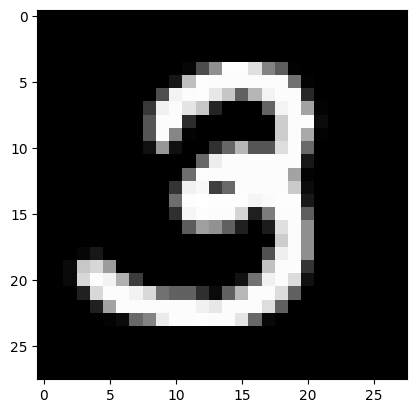

Previsão:  [5]
Resultado correto:  5


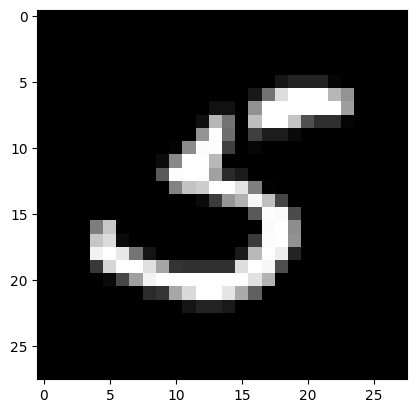

Previsão:  [8]
Resultado correto:  8


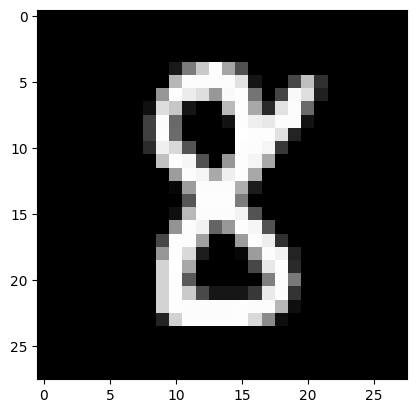

Previsão:  [4]
Resultado correto:  4


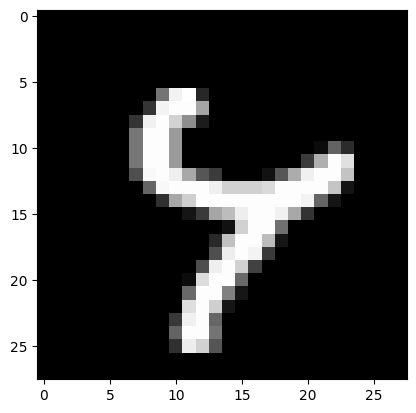

Previsão:  [4]
Resultado correto:  4


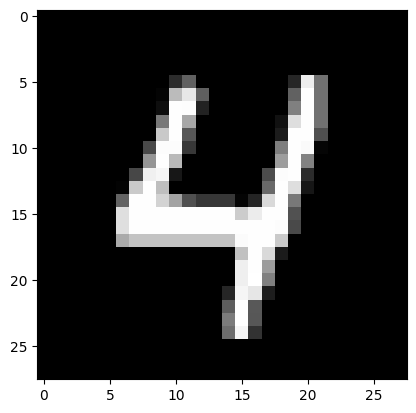

In [ ]:
resultado = pegaExemplosCertos(Y_dev, previsoes)

for elemento in resultado:
  testaPrevisoes(elemento, P1, v1, P2, v2)

Alguns casos em que o modelo errou:

Previsão:  [3]
Resultado correto:  5


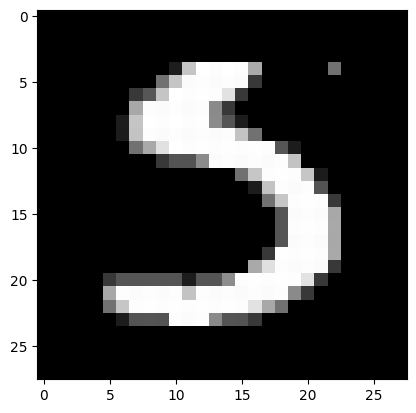

Previsão:  [1]
Resultado correto:  3


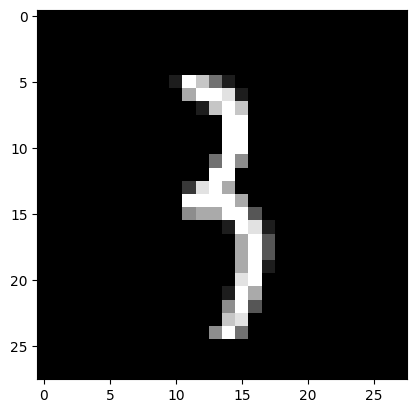

Previsão:  [5]
Resultado correto:  8


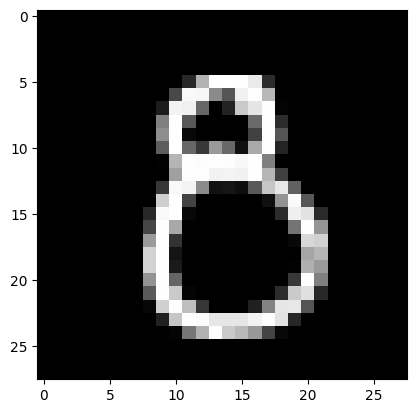

Previsão:  [5]
Resultado correto:  7


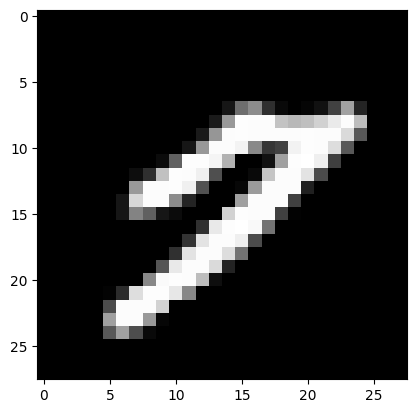

Previsão:  [0]
Resultado correto:  6


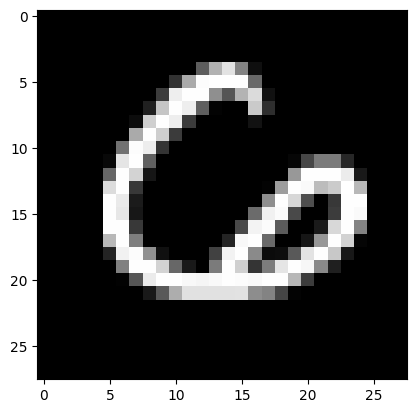

In [ ]:
resultado = pegaExemplosErrados(Y_dev, previsoes)

for elemento in resultado:
  testaPrevisoes(elemento, P1, v1, P2, v2)

Gráfico pré-gerado por conta da demora do modelo em realizar o treinamento.

Gráfico do desempenho final do treinamento por learning rate:

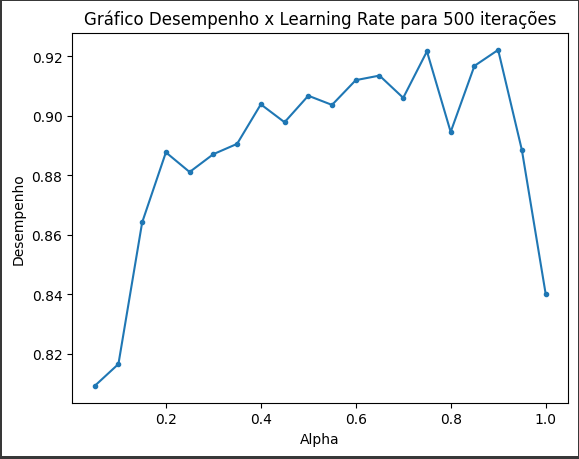

### Conclusão:

Por fim, concluímos que o desempenho foi bastante satisfatório para um modelo tão simples, sem utilizar bibliotecas como PyTorch ou TensorFlow. Para essa base de dados do MNIST, é possível obter um desempenho de 95%.

Este projeto me ajudou a compreender melhor os algoritmos apresentados em sala, principalmente o backpropagation, e como os diferentes níveis se relacionam ao longo das iterações do gradiente descendente.

Espero que as etapas do desenvolvimento tenham sido claras e esclarecedoras.

### Referências:

Colab MNIST:
https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/MNIST.ipynb

https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65

https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/

https://en.wikipedia.org/wiki/Softmax_function

https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

https://numpy.org/doc/